In [300]:
%matplotlib inline
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
from platform import python_version
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
from IPython.display import HTML
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Data Characteristics

In [301]:
full_data = pd.read_csv("./nba_rookie.csv")
data = full_data.dropna(axis=0)
features_list = list(data.columns)[1:-1]
target_variable = list(data.columns)[-1]

## What the Data Looks Like

In [302]:
pd.set_option('display.max_columns', None)
data.head(10)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0.0
6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,50.0,1.5,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1.0
7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,30.0,0.7,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1.0
8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0.0
9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,21.4,1.0,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0.0


In [303]:
data = data.iloc[: , 1:]
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Data Size and Statistical Information

In [304]:
print('Total number of samples:', len(data))

Total number of samples: 1329


In [305]:
yes = int(sum(data['TARGET_5Yrs']))
no = int(len(data) - yes)

print("Total number of 'Yes, played for 5 or more years' samples:", yes)
print("Total number of 'No, did not play for 5 or more years' samples:", no)

Total number of 'Yes, played for 5 or more years' samples: 826
Total number of 'No, did not play for 5 or more years' samples: 503


In [306]:
print('Total number of features:', len(features_list))
print('Features:', features_list)

Total number of features: 19
Features: ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']


## Splitting and Standarding Data and Parameter Tuning

In [374]:
X = np.array(data[features_list]) 
y = np.array(data[target_variable])

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
scaler = StandardScaler()
scaler.fit_transform(X);

In [400]:
print("Total number of samples in the training set:", len(X_train))
print("Total number of samples in the testing set:", len(X_test))

Total number of samples in the training set: 930
Total number of samples in the testing set: 399


In [404]:
parameters = {'max_features':range(1, 20), 'min_samples_leaf':range(1,20), 'min_samples_split':range(2, 20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=X_train, y=y_train)
print (clf.best_score_, clf.best_params_) 

0.696774193548387 {'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 11}


# Models: Feature Importances and Decision Trees

## Cross-Validated Model

In [405]:
clf_cv = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, min_samples_leaf=19, min_samples_split=11, max_features=3)
clf_cv.fit(X_train, y_train);

In [433]:
fis_cv = []
for name, feature in zip(features_list, clf_cv.feature_importances_):
    fis_cv.append((name, np.round(feature, 3)))
    
fis_cv_df = pd.DataFrame(fis_cv, columns=['Category', 'FI'])
sorted_fis_cv = fis_cv_df.sort_values(by='FI', ascending=False)
sorted_fis_cv[:5]

,Category,FI
0,GP,0.400
1,MIN,0.107
5,FG%,0.101
2,PTS,0.076
8,3P%,0.063


<AxesSubplot:xlabel='Category'>

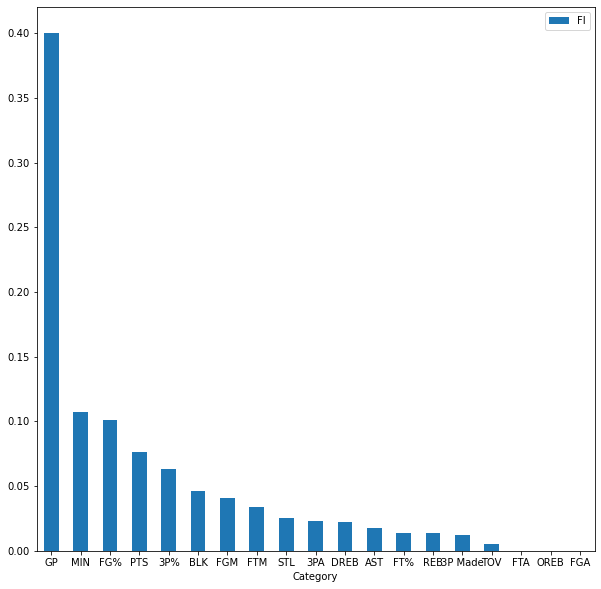

In [426]:
sorted_fis_cv.plot.bar(x='Category', y='FI', rot=0, figsize=(10,10))

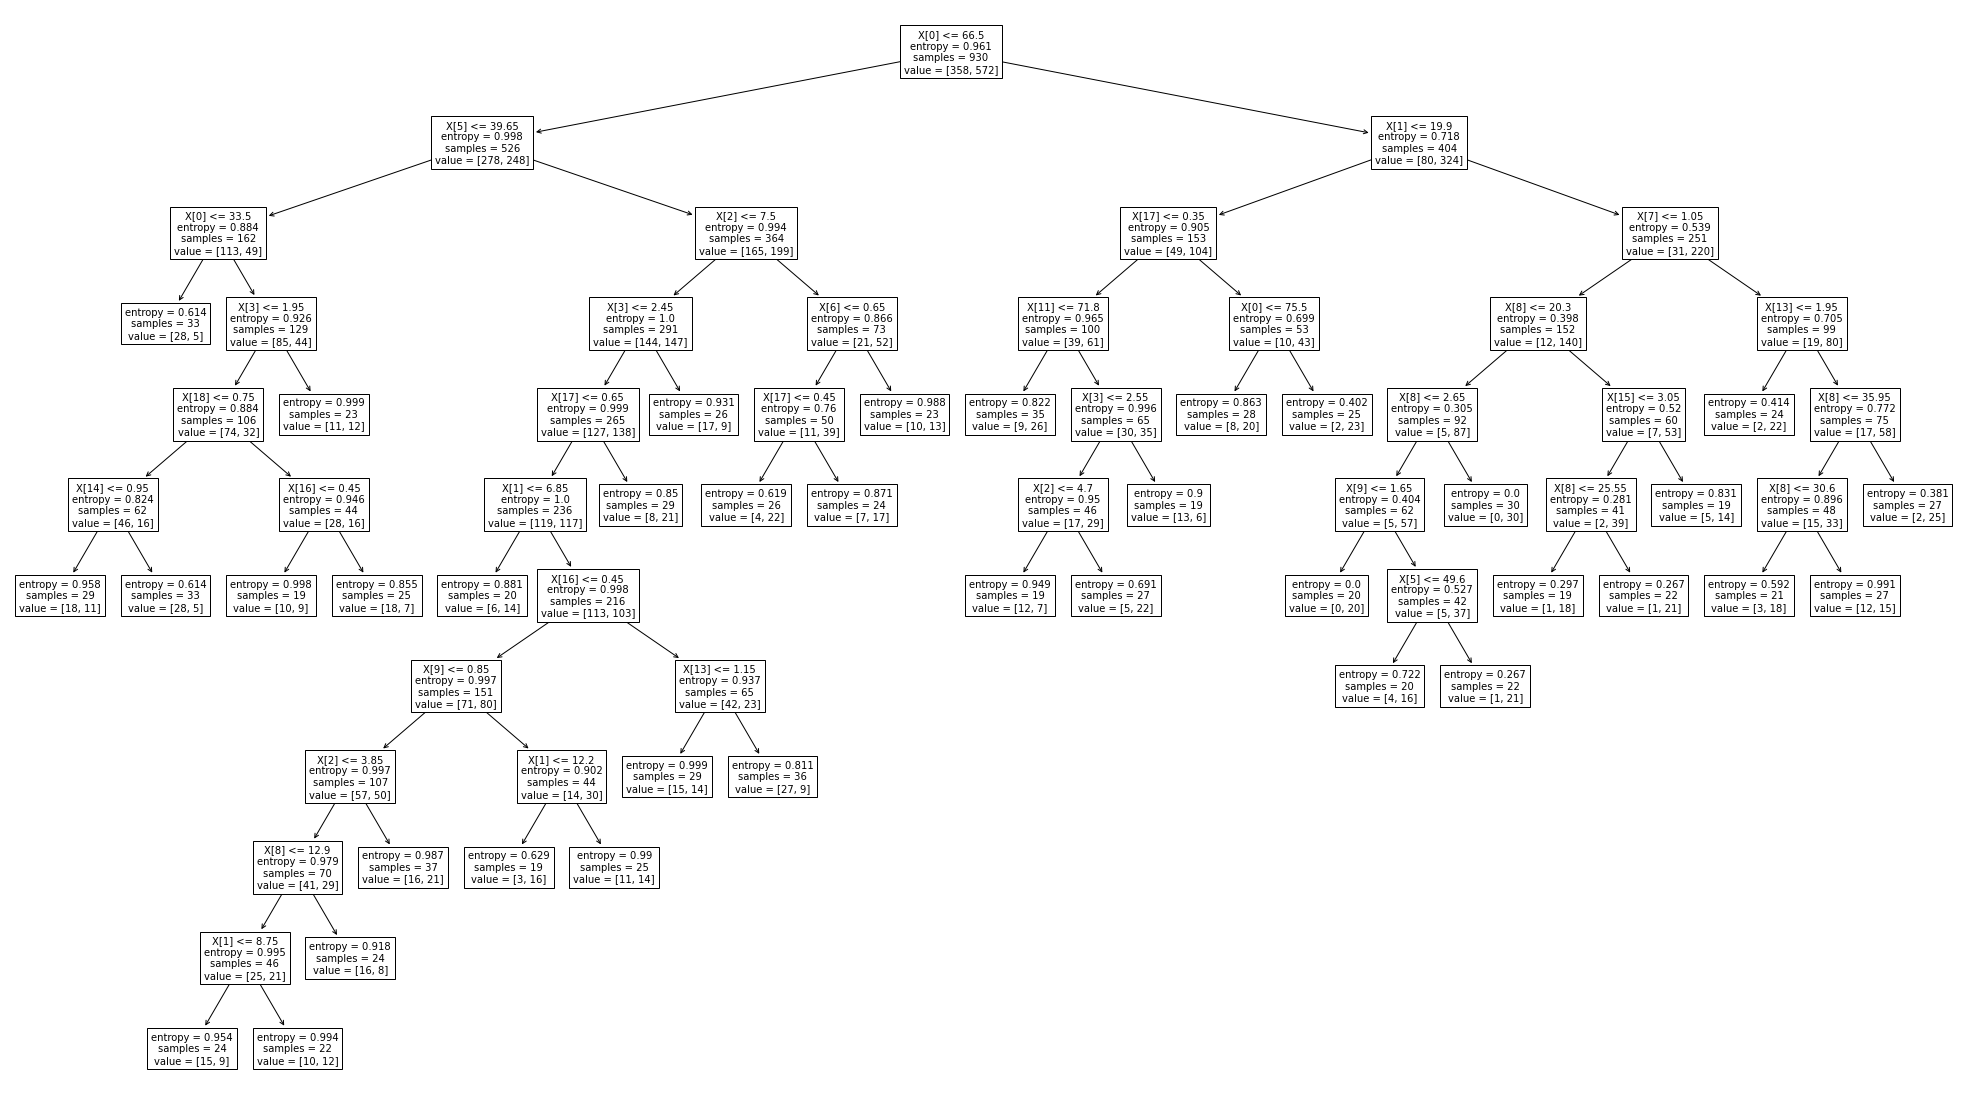

In [427]:
plt.figure(figsize=(35,20))
tree.plot_tree(clf_cv, fontsize=10)
plt.show()

## Defaults Model

In [409]:
clf_default = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_default.fit(X_train, y_train);

In [432]:
fis_default = []
for name, feature in zip(features_list, clf_default.feature_importances_):
    fis_default.append((name, np.round(feature, 3)))
    
fis_default_df = pd.DataFrame(fis_default, columns=['Category', 'FI'])
sorted_fis_default = fis_default_df.sort_values(by='FI', ascending=False)
sorted_fis_default[:5]

,Category,FI
0,GP,0.130
12,OREB,0.117
5,FG%,0.091
4,FGA,0.082
1,MIN,0.081


<AxesSubplot:xlabel='Category'>

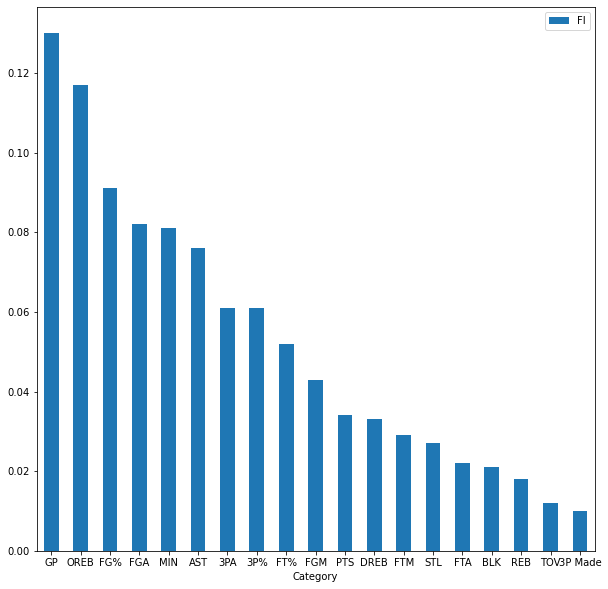

In [429]:
sorted_fis_default.plot.bar(x='Category', y='FI', rot=0, figsize=(10,10))

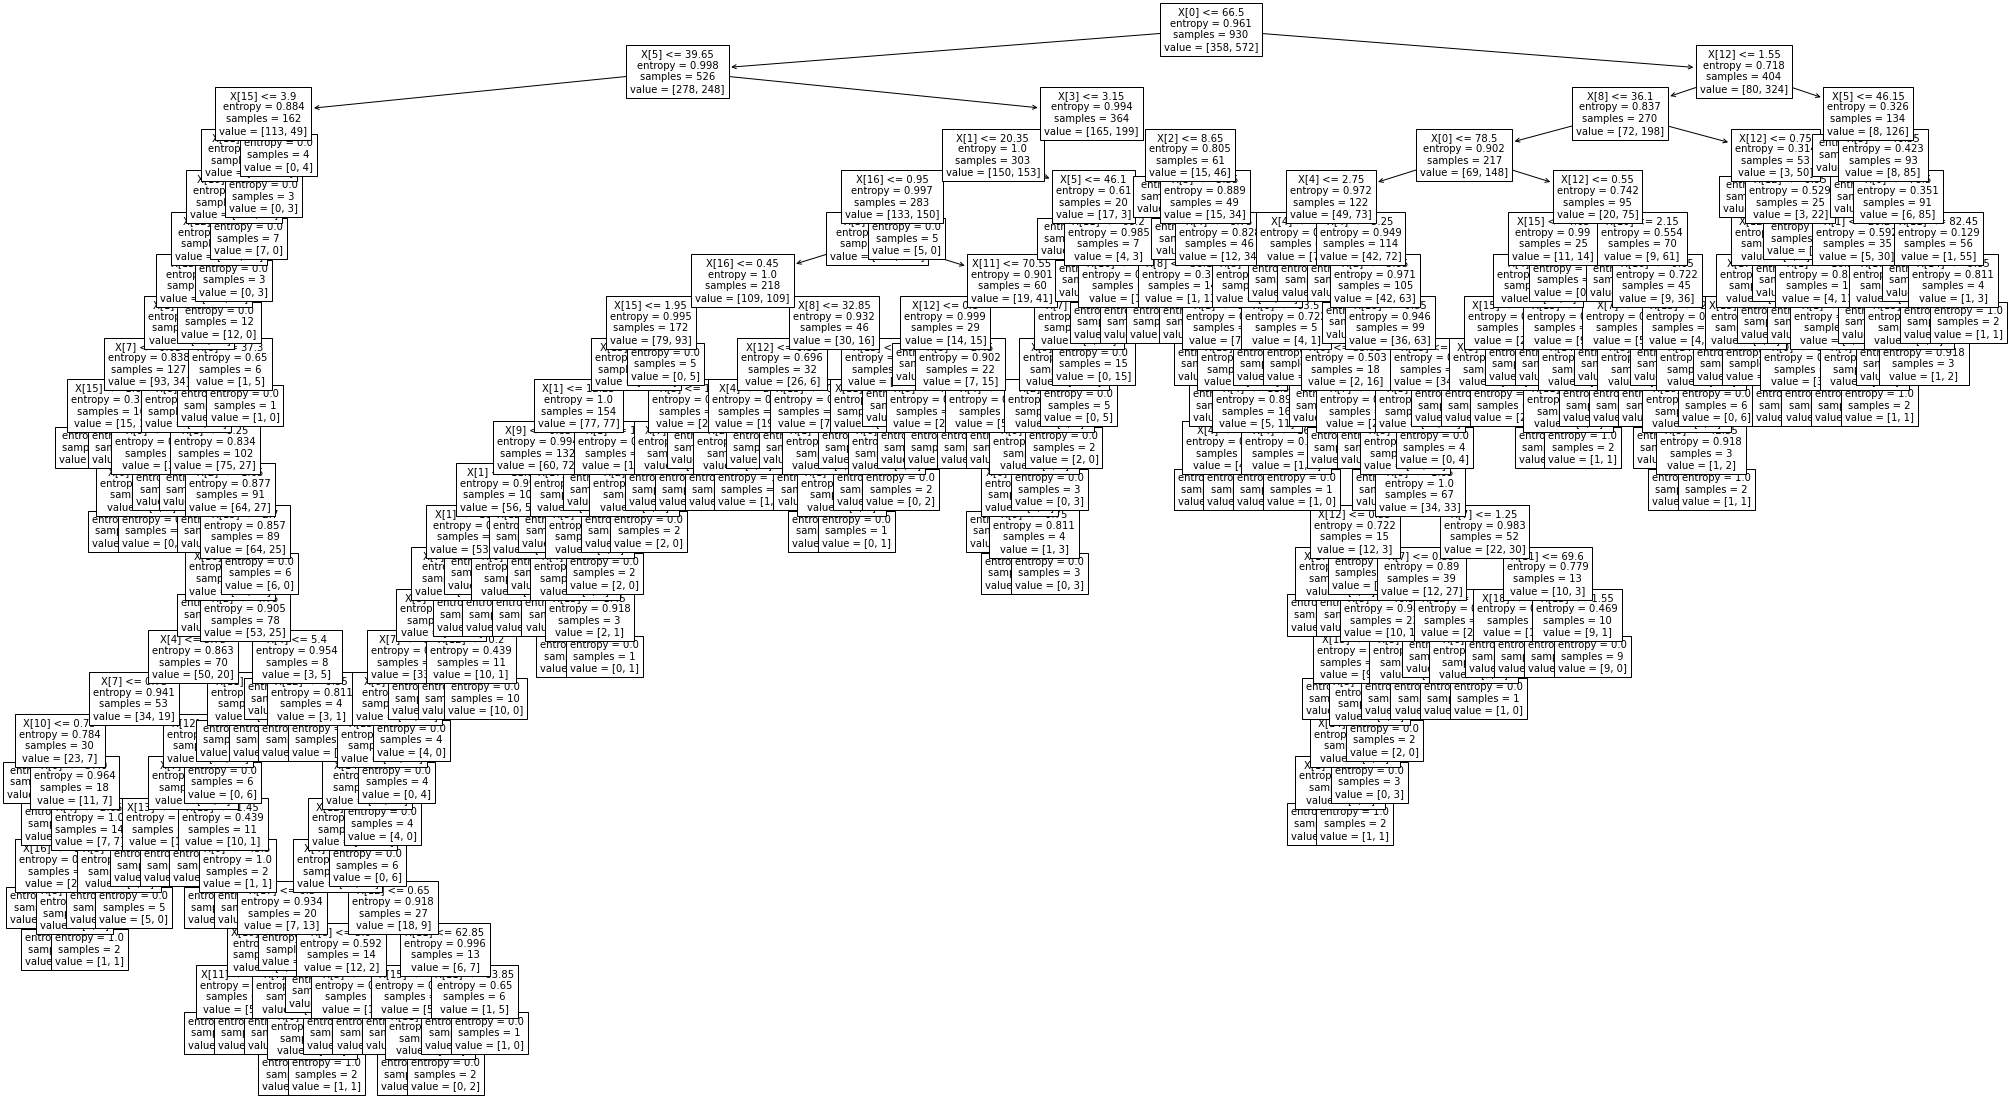

In [430]:
plt.figure(figsize=(35,20))
tree.plot_tree(clf_default, fontsize=10)
plt.show()

# Model Performances and Errors

In [436]:
performances = []

y_pred_cv = clf_cv.predict(X_test)
prfs = list(precision_recall_fscore_support(y_test, y_pred_cv, average='weighted'))
cv_perf = ['cross-validated', roc_auc_score(y_test, y_pred_cv), accuracy_score(y_test, y_pred_cv)]
cv_perf.extend(prfs[:-1])
performances.append(tuple(cv_perf))

y_pred_default = clf_default.predict(X_test)
prfs = list(precision_recall_fscore_support(y_test, y_pred_default, average='weighted'))
default_perf = ['default', roc_auc_score(y_test, y_pred_default), accuracy_score(y_test, y_pred_default)]
default_perf.extend(prfs[:-1])
performances.append(tuple(default_perf))

pd.DataFrame(performances, columns=['Model','ROC AUC Score','Accuracy Score', 'Precision', 'Recall', 'F-Score'])

,Model,ROC AUC Score,Accuracy Score,Precision,Recall,F-Score
0,cross-validated,0.652851,0.669173,0.676657,0.669173,0.672103
1,default,0.621830,0.639098,0.648240,0.639098,0.642665


In [415]:
print(classification_report(y_test, y_pred_cv, target_names=['no, did not play 5 years', 'yes, played 5 or more years']))

                             precision    recall  f1-score   support

   no, did not play 5 years       0.54      0.59      0.57       145
yes, played 5 or more years       0.75      0.71      0.73       254

                   accuracy                           0.67       399
                  macro avg       0.65      0.65      0.65       399
               weighted avg       0.68      0.67      0.67       399



In [416]:
print(classification_report(y_test, y_pred_default, target_names=['no, did not play 5 years', 'yes, played 5 or more years']))

                             precision    recall  f1-score   support

   no, did not play 5 years       0.50      0.56      0.53       145
yes, played 5 or more years       0.73      0.69      0.71       254

                   accuracy                           0.64       399
                  macro avg       0.62      0.62      0.62       399
               weighted avg       0.65      0.64      0.64       399



Accuracy: 66.9172932330827%
Confusion Matrix:
[[ 86  59]
 [ 73 181]]


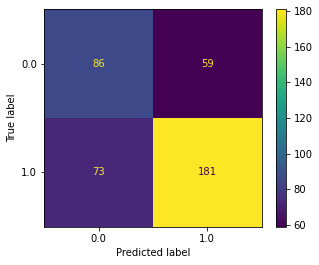

In [417]:
print("Accuracy: {}%".format(accuracy_score(y_test, y_pred_cv)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, y_pred_cv)))
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_cv.classes_)
disp.plot();

Accuracy: 63.90977443609023%
Confusion Matrix:
[[ 81  64]
 [ 80 174]]


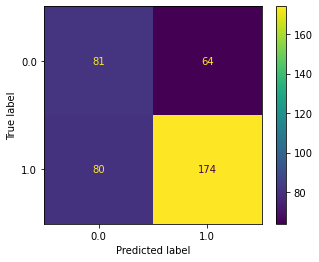

In [418]:
print("Accuracy: {}%".format(accuracy_score(y_test, y_pred_default)*100))
print("Confusion Matrix:")
print("{}".format(confusion_matrix(y_test, y_pred_default)))
cm = confusion_matrix(y_test, y_pred_default)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_default.classes_)
disp.plot();

#### Instances of classifiers misclassifying samples.

In [419]:
df = pd.DataFrame(X_test, columns = features_list)
df["actual"] = y_test
df["predicted"] = y_pred_cv
incorrect_cv = df[df["actual"] != df["predicted"]]
cv_inc_list = incorrect_cv.index.values.tolist() 
incorrect_cv

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,actual,predicted
6,49.0,15.9,6.2,2.6,5.4,46.8,0.0,0.0,0.0,1.1,1.6,67.5,1.3,1.7,3.0,0.4,0.4,0.3,0.5,1.0,0.0
10,25.0,29.5,12.3,5.2,10.5,49.0,0.2,0.6,25.0,1.8,2.6,69.7,2.0,3.5,5.5,1.7,1.2,0.2,1.9,0.0,1.0
13,56.0,9.6,3.4,1.4,3.0,45.6,0.0,0.1,0.0,0.7,1.0,65.5,0.5,0.8,1.2,1.1,0.6,0.2,0.8,1.0,0.0
16,51.0,13.4,4.8,1.8,4.1,44.5,0.0,0.0,0.0,1.1,1.6,72.5,0.6,1.6,2.2,0.8,0.4,0.3,0.9,0.0,1.0
22,57.0,8.2,2.1,0.9,2.2,39.7,0.1,0.2,23.1,0.3,0.4,78.3,0.4,0.6,1.0,0.8,0.4,0.0,0.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,79.0,13.4,2.9,1.1,3.3,32.7,0.2,0.8,20.9,0.6,0.7,81.8,0.7,2.6,3.3,0.7,0.5,0.3,0.7,1.0,0.0
386,49.0,11.9,5.3,2.3,5.1,44.6,0.0,0.1,0.0,0.8,1.1,72.2,0.2,0.4,0.6,1.2,0.4,0.0,1.0,0.0,1.0
389,67.0,27.0,7.8,2.6,7.1,36.7,1.4,4.1,33.5,1.2,1.9,64.6,0.9,2.4,3.3,3.1,1.5,0.3,1.3,0.0,1.0
393,75.0,17.9,7.3,2.8,6.0,47.0,0.0,0.1,0.0,1.7,2.2,76.2,1.1,2.0,3.1,0.7,0.4,0.3,0.9,1.0,0.0


In [420]:
df = pd.DataFrame(X_test, columns = features_list)
df["actual"] = y_test
df["predicted"] = y_pred_default
incorrect_default = df[df["actual"] != df["predicted"]]
default_inc_list = incorrect_default.index.values.tolist() 
incorrect_default

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,actual,predicted
1,51.0,6.6,2.5,1.0,2.0,51.0,0.0,0.0,50.0,0.4,0.5,71.4,0.8,1.1,1.9,0.3,0.2,0.3,0.5,1.0,0.0
6,49.0,15.9,6.2,2.6,5.4,46.8,0.0,0.0,0.0,1.1,1.6,67.5,1.3,1.7,3.0,0.4,0.4,0.3,0.5,1.0,0.0
7,51.0,11.9,5.2,1.8,4.4,41.3,0.7,2.1,33.0,0.8,1.0,85.7,0.3,0.8,1.1,1.7,0.3,0.1,0.9,1.0,0.0
8,75.0,18.7,7.5,3.1,6.7,46.7,0.0,0.0,33.3,1.3,1.9,67.6,2.4,4.7,7.1,0.7,0.8,1.1,1.4,1.0,0.0
9,77.0,16.0,4.5,1.7,4.4,38.4,0.7,2.3,32.0,0.4,0.5,75.6,0.2,1.4,1.6,0.9,0.4,0.2,0.6,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,67.0,27.0,7.8,2.6,7.1,36.7,1.4,4.1,33.5,1.2,1.9,64.6,0.9,2.4,3.3,3.1,1.5,0.3,1.3,0.0,1.0
390,62.0,14.1,5.2,1.8,5.3,34.1,0.7,2.6,28.4,0.8,1.2,67.1,0.2,0.9,1.1,1.5,0.6,0.1,1.0,0.0,1.0
395,68.0,14.8,6.6,2.5,5.5,45.6,0.0,0.2,8.3,1.6,2.2,74.3,1.1,2.4,3.5,1.3,0.3,0.2,1.0,1.0,0.0
397,28.0,8.1,1.7,0.6,1.4,42.5,0.3,0.8,30.4,0.2,0.3,85.7,0.3,1.1,1.5,0.4,0.2,0.1,0.5,0.0,1.0


In [437]:
overlap = [value for value in cv_inc_list if value in default_inc_list]
print('Number of samples that the cross-validated and default parameters models both misclassified:', len(overlap))

Number of samples that the cross-validated and default parameters models both misclassified: 75


In [444]:
y_pred = [1, 0, 1, 0, 1, 0]
y_true = [1, 1, 1, 0, 0, 0]

In [445]:
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [1, 2]])

In [446]:
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, None)

In [447]:
roc_auc_score(y_true, y_pred)

0.6666666666666667

In [449]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_actual = [3,9,4,2,7]
y_predicted = [2,7,4,3,6]

In [450]:
mean_absolute_error(y_actual, y_predicted)

1.0

In [451]:
mean_squared_error(y_actual, y_predicted)

1.4

In [452]:
7/5


1.4

In [453]:
from sklearn.naive_bayes import GaussianNB

In [491]:
clf = GaussianNB()

In [489]:
d = {'happy': [1, 1], 'gift': [1, 1], 'birthday': [0, 2], 'ad':['yes', 'no']}
df = pd.DataFrame(data=d)
X = np.array(([1, 1, 0], [1, 1, 2]))

In [476]:
df

,happy,gift,birthday,ad
0,1,1,0,yes
1,1,1,2,no


In [487]:
X = np.array(df.iloc[])

SyntaxError: invalid syntax (54028201.py, line 1)

In [498]:
X

array([[1, 1, 0],
       [1, 1, 2]])

In [500]:
X = np.array([1, 1, 0], [1, 1, 2])
y = np.array(['yes', 'no'])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X, y)
array = np.array(np.array(([1, 1, 0], [1, 1, 2]))).reshape(-1, 1)
clf.predict_proba(array)

TypeError: Field elements must be 2- or 3-tuples, got '1'

In [529]:
from sklearn import metrics
y = np.array([1, 0, 1, 0, 1, 0])
scores = np.array([.8, .7, .6, .45, .3, .2])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)

In [530]:
fpr


array([0.        , 0.        , 0.33333333, 0.33333333, 0.66666667,
       0.66666667, 1.        ])

In [531]:
tpr

array([0.        , 0.33333333, 0.33333333, 0.66666667, 0.66666667,
       1.        , 1.        ])

In [532]:
metrics.roc_curve(y, scores, pos_label=1)

(array([0.        , 0.        , 0.33333333, 0.33333333, 0.66666667,
        0.66666667, 1.        ]),
 array([0.        , 0.33333333, 0.33333333, 0.66666667, 0.66666667,
        1.        , 1.        ]),
 array([1.8 , 0.8 , 0.7 , 0.6 , 0.45, 0.3 , 0.2 ]))

In [533]:
roc_auc_score(y, scores)

0.6666666666666667